In [28]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
ep_df = pd.read_csv('/workspaces/sRNAs_Interactomes/output/EP-OD0w11_highCovarage_results.csv')

ep_df[ep_df['name'] == 'StyR-29(ncRNA0419)'][['name', 'from', 'to', 'sstart_genome', 'send_genome', 'Strand']]

,name,from,to,sstart_genome,send_genome,Strand
19,StyR-29(ncRNA0419),52558,52583,52584,52530,-
20,StyR-29(ncRNA0419),52558,52583,52584,52530,-
21,StyR-29(ncRNA0419),52558,52583,52584,52530,-
22,StyR-29(ncRNA0419),52558,52583,2375464,2375443,-
23,StyR-29(ncRNA0419),52558,52583,2375464,2375443,-
24,StyR-29(ncRNA0419),52558,52583,2375464,2375443,-
25,StyR-29(ncRNA0419),52559,52598,52599,52530,-
26,StyR-29(ncRNA0419),52559,52598,52599,52530,-
27,StyR-29(ncRNA0419),52559,52598,52599,52530,-
28,StyR-29(ncRNA0419),52559,52598,52599,52530,-


In [7]:
# def get_alignment_start_diff(row):
    
#     if row['Strand'] == '-':
#         return row['send_genome'] - row['from']
    
#     return row['sstart_genome'] - row['from']

# def get_alignment_end_diff(row):
    
#     if row['Strand'] == '-':
#         return row['sstart_genome'] - row['to']
    
#     return row['send_genome'] - row['to']


def get_alignment_start_diff(row):
    q_start = min(row['from'], row['to'])    
    s_start = min(row['sstart_genome'], row['send_genome'])

    return abs(s_start - q_start)

def get_alignment_end_diff(row):
    q_end = max(row['from'], row['to'])    
    s_end = max(row['sstart_genome'], row['send_genome'])

    return abs(s_end - q_end)
        

In [8]:
ep_df['start_diff'] = ep_df.apply(get_alignment_start_diff, axis=1)
ep_df['end_diff'] = ep_df.apply(get_alignment_end_diff, axis=1)

,start_diff,end_diff
count,1.755000e+04,1.755000e+04
mean,1.153519e+06,1.153500e+06
std,1.226572e+06,1.226554e+06
min,1.000000e+00,1.000000e+00
25%,5.659100e+04,5.659600e+04
50%,6.980870e+05,6.973280e+05
75%,1.912472e+06,1.912464e+06
max,4.833311e+06,4.833319e+06


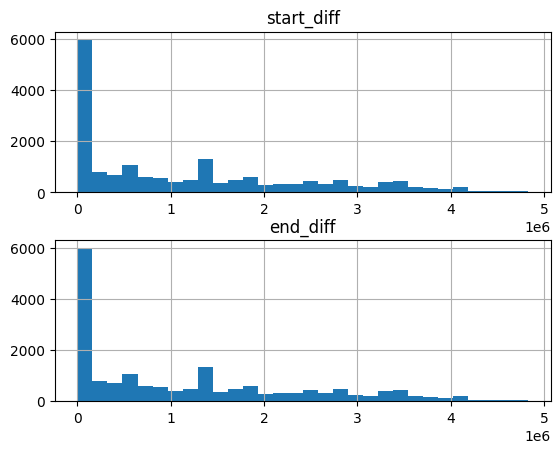

In [9]:
ep_df[['start_diff', 'end_diff']].hist(bins=30, layout=(2,1))

ep_df[['start_diff', 'end_diff']].describe()


In [10]:
aggregated_df = ep_df.groupby('query_id').agg({'start_diff': 'min', 'end_diff': 'min'})


,start_diff,end_diff
count,7.050000e+02,7.050000e+02
mean,1.209128e+04,1.208377e+04
std,1.308492e+05,1.308478e+05
min,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00
50%,2.200000e+01,1.000000e+00
75%,3.400000e+01,2.800000e+01
max,1.622471e+06,1.622451e+06


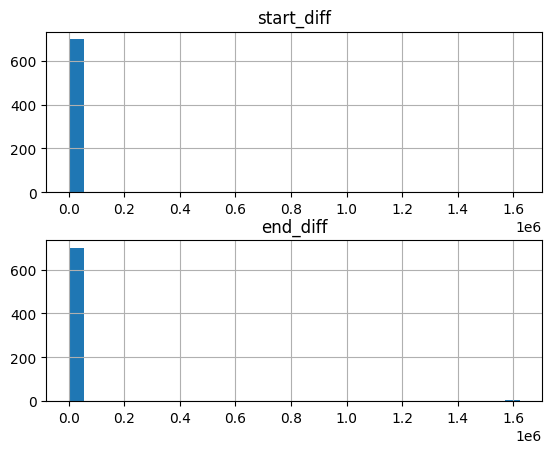

In [11]:
aggregated_df[['start_diff', 'end_diff']].hist(bins=30, layout=(2,1))

aggregated_df[['start_diff', 'end_diff']].describe()

In [24]:
def filter_outliers(df, percentile=0.98):
    Q = df.quantile(percentile)
    
    no_outliers_df = df[(df < Q).all(axis=1)]
    return no_outliers_df
# END: /workspaces/sRNAs_Interactomes/alignment_analysis.ipynb
    
    return no_outliers_df


<Figure size 640x480 with 0 Axes>

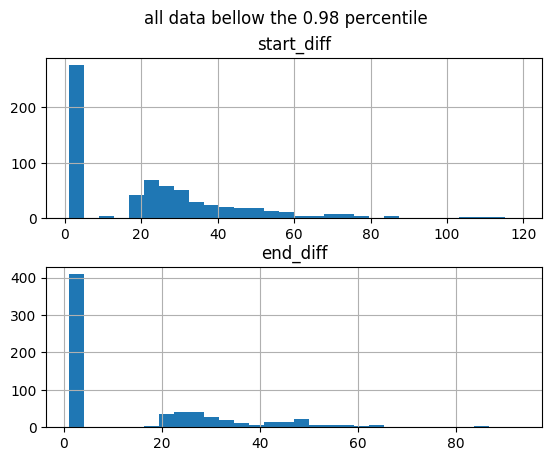

,start_diff,end_diff
count,682.000000,682.000000
mean,22.346041,14.717009
std,22.814206,19.296526
min,1.000000,1.000000
25%,1.000000,1.000000
50%,22.000000,1.000000
75%,33.000000,27.000000
max,119.000000,93.000000


In [30]:
percentile = 0.98
aggregated_filtered = filter_outliers(aggregated_df, percentile)
plt.figure()
aggregated_filtered[['start_diff', 'end_diff']].hist(bins=30, layout=(2,1))
plt.suptitle('all data bellow the {} percentile'.format(percentile))  # Set the figure title
plt.show()
aggregated_filtered.describe()

In [47]:
qyery_id_not_filtered = set(aggregated_filtered.index)
bad_alignments = ep_df[~ep_df['query_id'].isin(qyery_id_not_filtered)]
bad_alignments.query_id.nunique()

print(f"# of queries with no good alignment: {bad_alignments.query_id.nunique()} out of {ep_df.query_id.nunique()}")

# of queries with no good alignment: 23 out of 705
